In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline

In [6]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [7]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


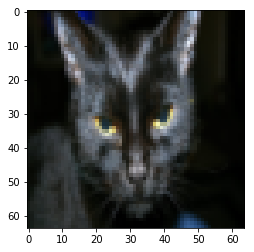

In [8]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [11]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
print(num_px)

64


In [6]:
train_set_flat = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_flat = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [7]:
train_set_flat=train_set_flat/255
test_set_flat=test_set_flat/255

In [8]:
train_set_flat.shape[0]

12288

In [9]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [10]:
sigmoid(9.2)

0.9998989708060922

In [11]:
def initialize_with_zeros(dim):
    w=np.zeros(dim).reshape(dim,1)
    b=0
    return w,b

In [12]:
initialize_with_zeros(7)

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]), 0)

In [13]:
def propagate(w, b, X, Y):
    m=X.shape[1]
    z=np.dot(w.T,X)+b
    a=sigmoid(z)
    cost=(-1/m)*np.sum(Y*np.log(a)+(1-Y)*np.log(1-a))
    dz=a-Y
    dw=(1/m)*np.dot(X,dz.T)
    db=(1/m)*np.sum(dz)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    return cost,dw,db

In [14]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
print(propagate(w, b, X, Y))

(6.000064773192205, array([[0.99993216],
       [1.99980262]]), 0.49993523062470574)


In [15]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs=[]
    
    for i in range(1,num_iterations+1):
        cost,dw,db=propagate(w, b, X, Y)
        costs.append(cost)
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if print_cost and i%100==0:
            print(cost)
    params={'w':w,'b':b}
    grads={'dw':dw,'db':db}
    return params,grads,costs

In [16]:
params,grads,cost=optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

In [17]:
def predict(w, b, X):
    z=np.dot(w.T,X)+b
    a=sigmoid(z)
    Y_prediction=np.where(a>=0.5,1,0)
    return Y_prediction

In [18]:
print("predictions = " + str(predict(w, b, X)))


predictions = [[1 1]]


In [19]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w,b=initialize_with_zeros(X_train.shape[0])
    params,grads,cost=optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w=params['w']
    b=params['b']
    Y_test_predicted=predict(w,b,X_test)
    accuracy=100 - np.mean(np.abs(Y_test_predicted - Y_test)) * 100
    d={'params':params,'grads':grads,'costs':cost,'test_accuracy':accuracy}
    return d

In [20]:
d = model(train_set_flat, train_set_y, test_set_flat, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

0.6448978829531701
0.4848936141484849
0.37776149521638064
0.3317754055523586
0.3035286720260553
0.28009427757967503
0.2602258475628189
0.24310018399838854
0.22814432769465368
0.21494377069682485
0.2031892821910463
0.19264428020365887
0.18312389153132902
0.1744810138688702
0.16659675354042905
0.15937369509858546
0.15273105849939206
0.14660114629898885
0.14092669166965172
0.13565884743936965


In [21]:
d['test_accuracy']

70.0

In [22]:
def categorize_image(filename):
    ## START CODE HERE ## (PUT YOUR IMAGE NAME) 
    my_image = filename   # change this to the name of your image file 
    ## END CODE HERE ##

    # We preprocess the image to fit your algorithm.
    fname =  my_image
    image = np.array(ndimage.imread(fname, flatten=False))
    my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
    my_predicted_image = predict(d['params']["w"], d['params']["b"], my_image)

    plt.imshow(image)
    print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


y = 1, your algorithm predicts a "cat" picture.


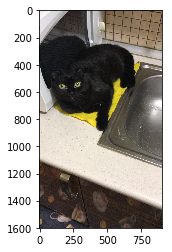

In [23]:
my_cat_1 = r"C:\Users\Kerem\Desktop\my-catdog-dset\cat1.jpg"
my_cat_2 = r"C:\Users\Kerem\Desktop\my-catdog-dset\cat9.jpg"
my_cat_3 = r"C:\Users\Kerem\Desktop\my-catdog-dset\cat7.jpg"
my_cat_4 = r"C:\Users\Kerem\Desktop\my-catdog-dset\cat8.jpg"
my_cat_5 = r"C:\Users\Kerem\Desktop\my-catdog-dset\cat4.jpg"
my_cat_6 = r"C:\Users\Kerem\Desktop\my-catdog-dset\cat6.jpg"
my_cat_7 = r"C:\Users\Kerem\Desktop\my-catdog-dset\cat11.jpg"
categorize_image(my_cat_1)

y = 1, your algorithm predicts a "cat" picture.


C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


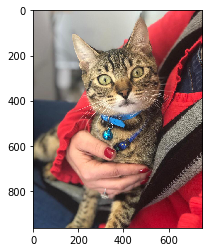

In [24]:
categorize_image(my_cat_2)

C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


y = 0, your algorithm predicts a "non-cat" picture.


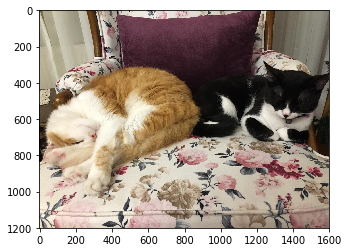

In [25]:
categorize_image(my_cat_3)

C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


y = 1, your algorithm predicts a "cat" picture.


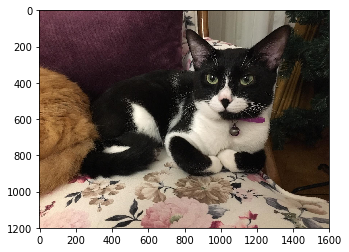

In [26]:
categorize_image(my_cat_4)

C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


y = 1, your algorithm predicts a "cat" picture.


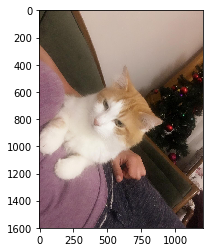

In [28]:
categorize_image(my_cat_6)

C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


y = 1, your algorithm predicts a "cat" picture.


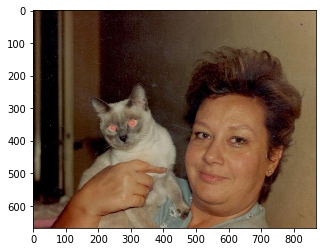

In [29]:
categorize_image(my_cat_7)

y = 1, your algorithm predicts a "cat" picture.


C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


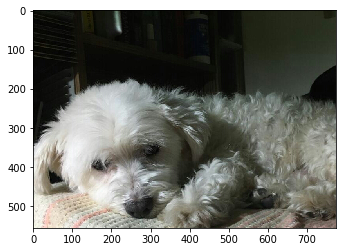

In [30]:
my_dog_1 = r"C:\Users\Kerem\Desktop\my-catdog-dset\dog2.jpg"
my_dog_2 = r"C:\Users\Kerem\Desktop\my-catdog-dset\dog1.jpg"
my_dog_3 = r"C:\Users\Kerem\Desktop\my-catdog-dset\dog6.jpg"
my_dog_4 = r"C:\Users\Kerem\Desktop\my-catdog-dset\dog3.jpg"
categorize_image(my_dog_1)

y = 0, your algorithm predicts a "non-cat" picture.


C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\Kerem\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


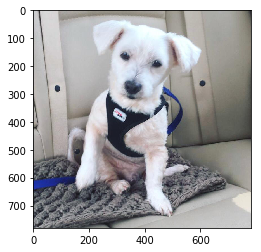

In [32]:
categorize_image(my_dog_3)

In [84]:
#from sklearn.linear_model import LogisticRegressionCV
#from sklearn.model_selection import GridSearchCV
#log_reg_cv = LogisticRegressionCV()
#log_reg_cv.fit(train_set_flat.T,train_set_y.T)

C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\lin

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [36]:
from sklearn.linear_model import LogisticRegressionCV

logistic_regression=LogisticRegressionCV()

loj_model = logistic_regression.fit(train_set_flat.T,train_set_y.T.ravel())

C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Kerem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to 

In [35]:
print("Model accuracy: {:.2f}%".format(logistic_regression.score(train_set_flat.T,train_set_y.T.ravel())*100))


Model accuracy: 65.55%


In [38]:
def categorize_image(filename):
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
    my_image = filename   # change this to the name of your image file 
    ## END CODE HERE ##

    # We preprocess the image to fit your algorithm.
    fname =  my_image
    image = np.array(ndimage.imread(fname, flatten=False))
    my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
    my_predicted_image = loj_model.predict(my_image)

    plt.imshow(image)
    print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")